# Data massplanes

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path+= ['../RRevolution/code/','../PAG-opt/','../code/']
from analysis import getXhh
from utils import mcToYr, L

from eventDisplays import rainbow_text

from plots import draw_SR, draw_VR, draw_CR

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [12]:
baseName = '../data/RR/nom_trigs_unblind/data{}_min_dR_VEC_sr_124_117.root'
tName = 'fullmassplane'
cols = ['ntag','m_hh','m_h1','m_h2','dEta_hh','pass_vbf_sel','kinematic_region']

print('Loading 2016')
with uproot.open(baseName.format(16)) as f:
    b16 = f[tName].arrays(cols,library='pd')
    
print('Loading 2017')
with uproot.open(baseName.format(17)) as f:
    b17 = f[tName].arrays(cols,library='pd')
    
print('Loading 2018')
with uproot.open(baseName.format(18)) as f:
    b18 = f[tName].arrays(cols,library='pd')

Loading 2016
Loading 2017
Loading 2018


In [13]:
x1,y1 = 124,117

In [14]:
eta_edgs = np.linspace(0, 1.5, 4)

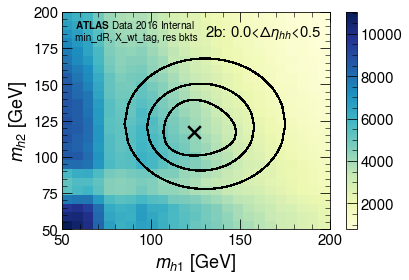

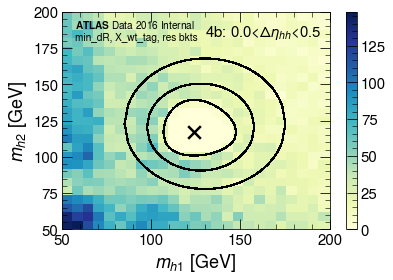

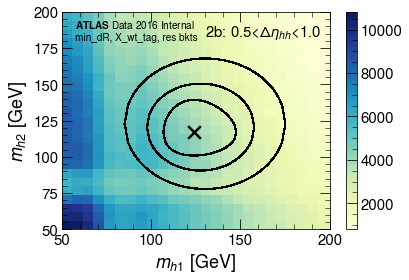

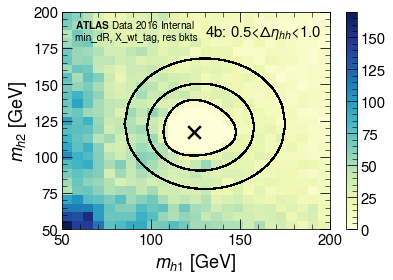

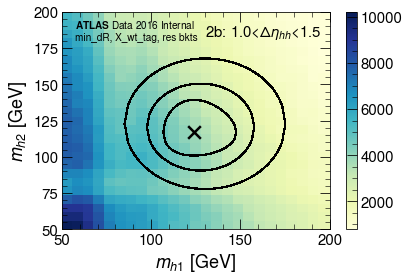

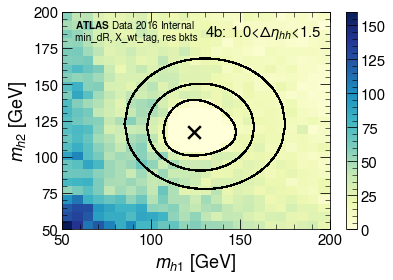

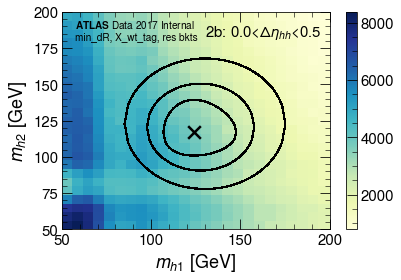

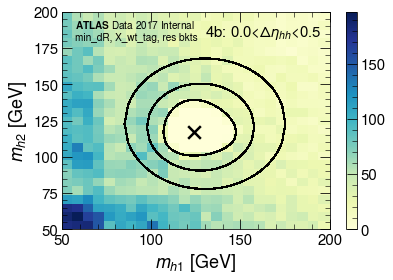

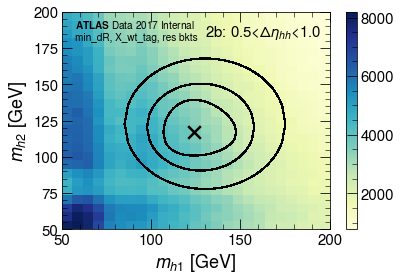

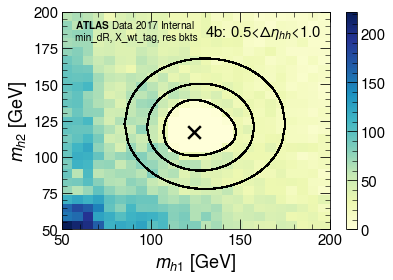

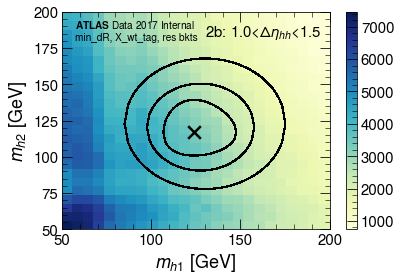

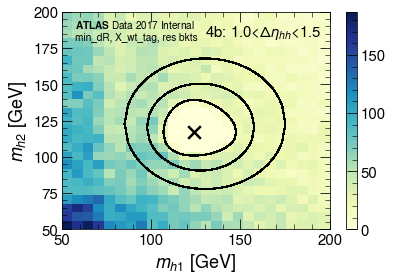

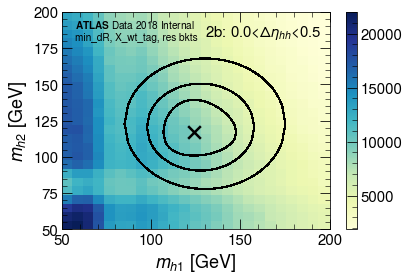

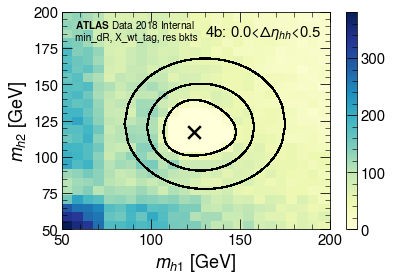

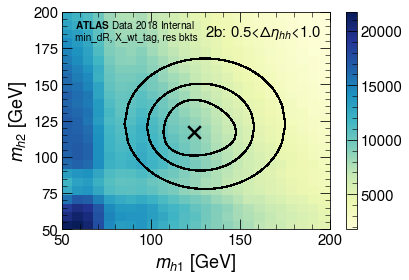

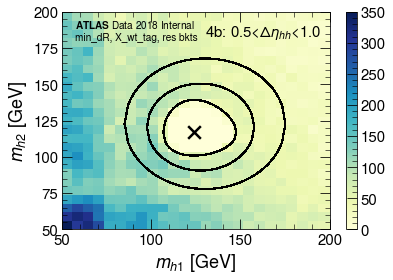

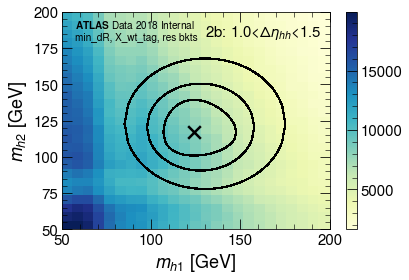

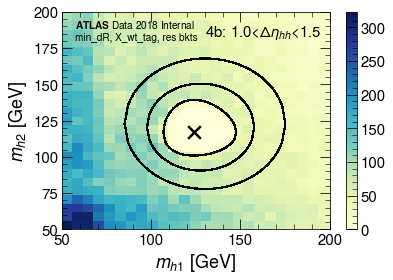

In [17]:
cmap = 'YlGnBu'

for yr, df in zip([16,17,18], [b16,b17,b18]):
    
    figDir = f'figures/data{yr}_sr_{x1}_{y1}/min_dR'
    
    text = "$\mathbf{ATLAS}$ Data"+f" 20{yr} Internal\n"
    text += "min_dR, X_wt_tag, res bkts"
    
    for eta_min, eta_max in zip(eta_edgs[:-1], eta_edgs[1:]):
    
        mi = (df.dEta_hh > eta_min) & (df.dEta_hh < eta_max) & (~df.pass_vbf_sel)
    
        for ntag in [2,4]:
            if ntag==4:
                m = mi & (df.ntag>=4) & (df.kinematic_region!=0) 
            else:
                m = mi & (df.ntag==ntag) 

                
            plt.figure()
            plt.hist2d(*df.loc[m,['m_h1','m_h2']].values.T, 25,[(50,200),(50,200)], cmap=cmap)
            #,weights=df.loc[m,'mc_sf'])
            plt.colorbar()
            plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
            plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)

            ax = plt.gca()
            title = f'{ntag}b: {eta_min}<'+"$\Delta \eta_{hh}$"+f'<{eta_max}'
            plt.text(0.97,0.95, title, transform=ax.transAxes, ha='right',va='top',fontsize=15)
            plt.text(0.05,0.97,text,transform=ax.transAxes,ha='left',va='top',fontsize=10)

            # Overlay our region definitions
            c = 'k'
            plt.scatter([x1],[y1],160,marker='x',color=c)
            for f in [draw_SR,draw_VR,draw_CR]:
                x,y = f(x1,y1)
                plt.plot(x,y,c,lw=1.2)

            plt.savefig(f'{figDir}/mp_{ntag}b_dEta_hh_{eta_min}_{eta_max}.pdf', bbox_inches='tight')